# "The Perceptron" summary

## Biological Foundations

Inpired by previous work from several researchers, Rosenblatt begins by questioning how information is stored in memory and how it influences recognition and behavior in biological brains. He proposes that:

- Images of stimuli may not be directly recorded at all
- The central nervous system functions as an intricate switching network
- Memory retention occurs through the formation of new connections between centers of neural activity
- These new pathways automatically activate appropriate responses when similar stimuli are encountered

Such brain would learn in the following way:
>  1. The physical connections of the nervous system which are involved in learning and recognition are not identical from one organism to another. At birth, the construction of the most important networks is largely random, subject to a minimum number of genetic constraints.
> 2. The original system of connected cells is capable of a certain amount of plasticity; after a period of neural activity, the probability that a stimulus applied to one set of cells will cause a response in some other set is likely to change, due to some relatively long-lasting changes in the neurons themselves.
> 3. Through exposure to a large sample of stimuli, those which are most "similar" (in some sense which must be defined in terms of the particular physical system) will tend to form pathways to the same sets of responding cells. Those which are markedly "dissimilar" will tend to develop connections to different sets of responding cells.
> 4. The application of positive and/or negative reinforcement (or stimuli which serve this function) may facilitate or hinder whatever formation of connections is currently in progress.
> 5. Similarity, in such a system, is represented at some level of the nervous system by a tendency of similar stimuli to activate the same sets of cells. Similarity is not a necessary attribute of particular formal or geometrical classes of stimuli, but depends on the physical organization of the perceiving system, an organization which evolves through interaction with a given environment. The structure of the system, as well as the ecology of the stimulus-environment, will affect, and will largely determine, the classes of "things" into which the perceptual world is divided.

## The Perceptron model

From these biological observations, Rosenblatt notes that randomly connected neurons plus a learning procedure can form powerful pattern-recognition systems and proposes a mathematical model, the perceptron:

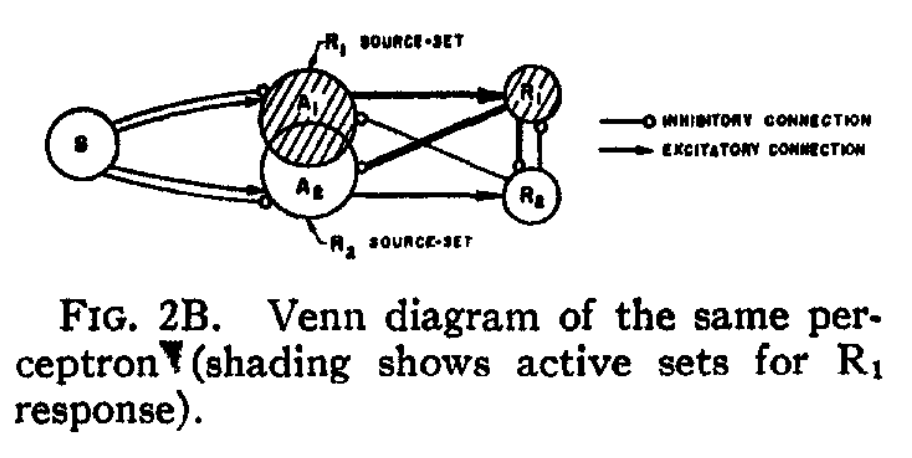

The key insight is that randomly connected neurons coupled with a learning procedure can form powerful pattern-recognition systems capable of statistical separability—reliably distinguishing between classes of inputs with sufficient statistical differences.

## Practical usage, extensibility and limitations

The proposed perceptron is more complex than the common perceptron model we usually refer to, as the hidden layer (associative unit) could have many neurons and each of them would have a different output and interact with it other.

However, commonly used perceptron is rooted in Rosenblatt's paper, as he suggests that "as the number of responses in the system increases, the performance becomes progressively poorer, if every response is made mutually exclusive of all alternatives. One method of avoiding this deterioration is through the binary coding of responses." which is a strong hint that a single neuron in the associative unit seems to be an optimal approach in practice.

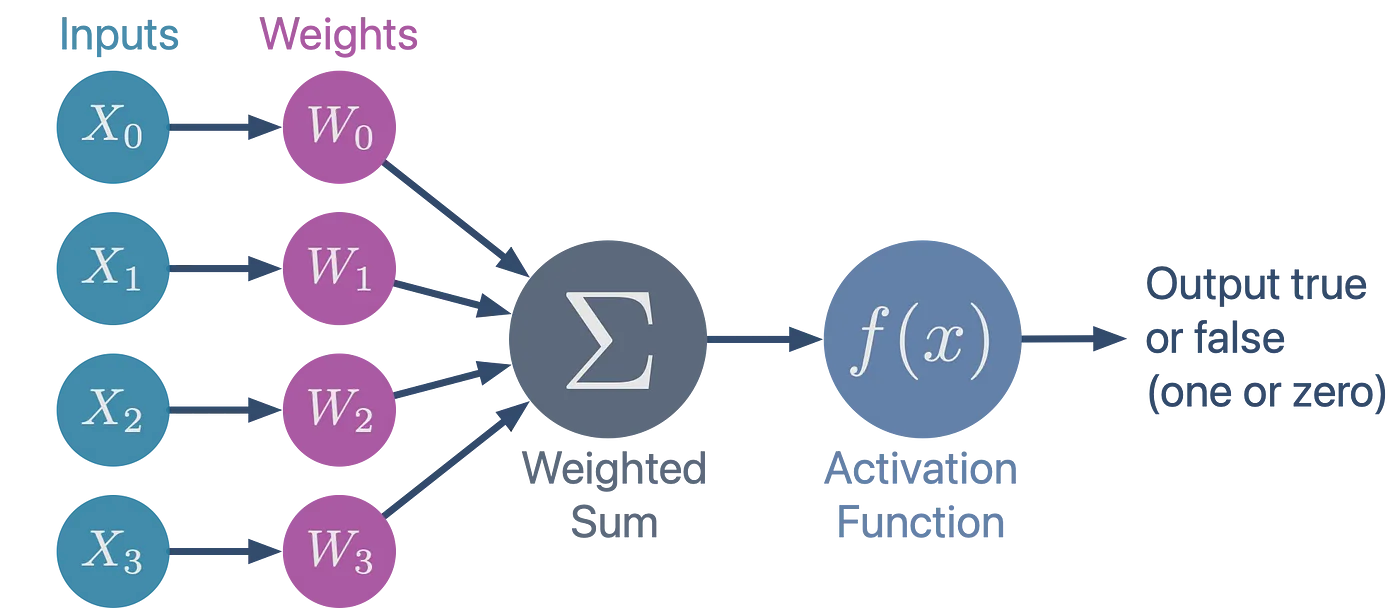

This realization opens the door for more complex models that would combine different binary classifiers to get the desired response. The paper doesn't extend on that idea, but other advances in the area can be said to build on top of it. For example, the inner structure of a multi layer perceptron can show this behavior (in an oppaque, non intentional way).

Rosenblatt acknowledged limitations of this approach: "The efficiency of such coding depends on the number of independently recognizable 'earmarks' that can be found to differentiate stimuli. If the stimulus can be identified only in its entirety and is not amenable to such analysis, then ultimately a separate binary response pair, or bit, is required to denote the presence or absence of each stimulus class (e.g., 'dog' or 'not dog'), and nothing has been gained over a system where all responses are mutually exclusive."

## Implementation

In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
"""
A simple Python implementation of a single neuron percepton and the learning rule
"""
class Perceptron:
    def __init__(self, learning_rate=1.0, n_iterations=10):
        self.lr = learning_rate
        self.n_iterations = n_iterations
        self.weights = None  # Will hold our learned weights
        self.bias = None     # Will hold our learned bias

    def fit(self, x, y):
        """
        X: Array of shape (n_samples, n_features)
        y: Array of shape (n_samples, ), labels are +1 or -1
        """
        n_samples, n_features = x.shape
        # Initialize weights and bias to 0
        self.weights = np.zeros(n_features)
        self.bias = 0.0

        # Perceptron training loop
        for _ in range(self.n_iterations):
            for xi, label in zip(x, y):
                # Calculate perceptron output
                # We'll use sign(w·x + b) as the output
                linear_output = np.dot(xi, self.weights) + self.bias
                predicted = 1 if linear_output >= 0 else -1

                # Update rule if misclassification occurs
                if predicted != label:
                    # Update weights
                    self.weights += self.lr * label * xi
                    # Update bias
                    self.bias += self.lr * label

    def predict(self, X):
        """Return +1 or -1 for each sample."""
        linear_output = np.dot(X, self.weights) + self.bias
        return np.where(linear_output >= 0, 1, -1)

Trained weights: [2.1538091 1.1432545]
Trained bias: -14.699999999999964
Accuracy on training set: 90.00%


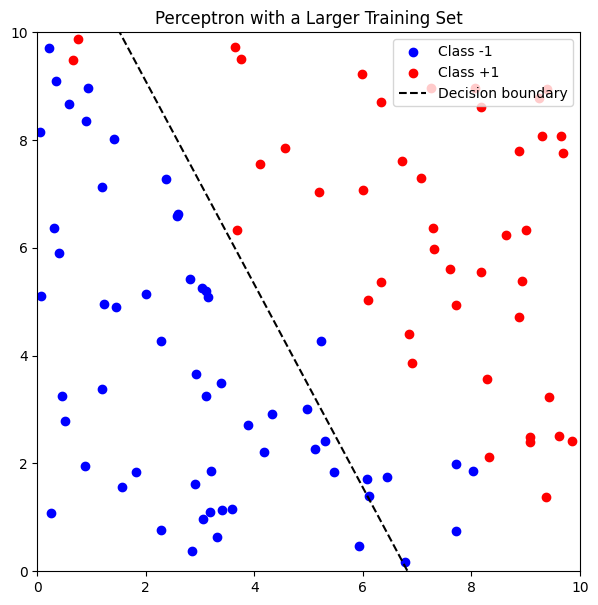

In [8]:
np.random.seed(42)

# Let's generate 100 random points in 2D
# We'll separate them by the line x1 + x2 = 5 (roughly).\n
N = 100
X_train = np.random.uniform(0, 10, (N, 2))  # 100 points in the range [0, 10]

# We'll label them based on x1 + x2 < 10 => -1, else +1.
y_train = []
for (x1, x2) in X_train:
    if (x1 + x2) < 10:
        y_train.append(-1)
    else:
        y_train.append(1)
y_train = np.array(y_train)

# Create and train the perceptron
perceptron = Perceptron(learning_rate=0.1, n_iterations=50)
perceptron.fit(X_train, y_train)

# Predict on training set to see how well it learned
y_pred = perceptron.predict(X_train)
accuracy = np.mean(y_pred == y_train)

print("Trained weights:", perceptron.weights)
print("Trained bias:", perceptron.bias)
print(f"Accuracy on training set: {accuracy * 100:.2f}%")

# Optional: plot the data + decision boundary
plt.figure(figsize=(7, 7))

# Plot points
plt.scatter(X_train[y_train == -1, 0], X_train[y_train == -1, 1], color='blue', label='Class -1')
plt.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], color='red', label='Class +1')

# We'll create a grid to plot the learned decision boundary
x_values = np.linspace(0, 10, 100)
# w0*x + w1*y + b = 0 => y = -(w0*x + b)/w1
if perceptron.weights[1] != 0:
    y_boundary = -(perceptron.weights[0] * x_values + perceptron.bias) / perceptron.weights[1]
    plt.plot(x_values, y_boundary, 'k--', label='Decision boundary')

plt.xlim(0, 10)
plt.ylim(0, 10)
plt.legend()
plt.title("Perceptron with a Larger Training Set")
plt.show()

Trained weights: [1.89702699 1.77321844 1.36575086]
Trained bias: -26.200000000000102
Accuracy on training set: 95.00%


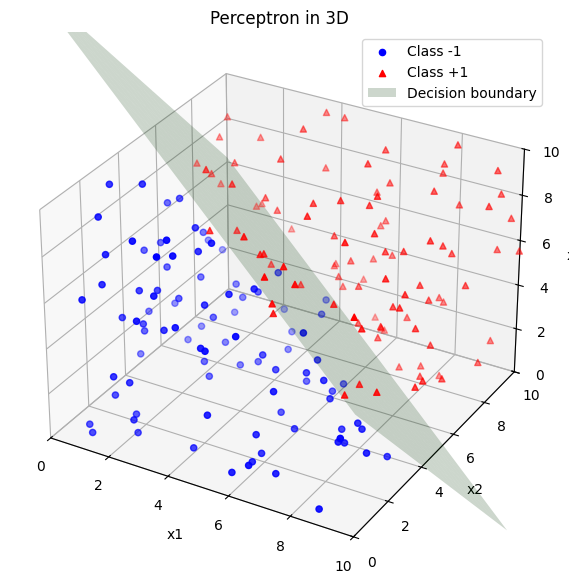

In [9]:
np.random.seed(42)
N = 200
# Generate 200 random points in 3D from 0..10
X_train = np.random.uniform(0, 10, (N, 3))

# Define labels by whether x1 + x2 + x3 < 15 => -1, else +1.
y_train = []
for (x1, x2, x3) in X_train:
    if (x1 + x2 + x3) < 15:
        y_train.append(-1)
    else:
        y_train.append(1)
y_train = np.array(y_train)

# Create and train
perceptron = Perceptron(learning_rate=0.1, n_iterations=50)
perceptron.fit(X_train, y_train)

# Evaluate
y_pred = perceptron.predict(X_train)
accuracy = np.mean(y_pred == y_train)
print("Trained weights:", perceptron.weights)
print("Trained bias:", perceptron.bias)
print(f"Accuracy on training set: {accuracy*100:.2f}%")

# Optional 3D scatter
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(projection='3d')

# Plot points in 3D, color-coded by class
ax.scatter(
    X_train[y_train == -1, 0],
    X_train[y_train == -1, 1],
    X_train[y_train == -1, 2],
    c='blue', marker='o', label='Class -1'
)
ax.scatter(
    X_train[y_train == 1, 0],
    X_train[y_train == 1, 1],
    X_train[y_train == 1, 2],
    c='red', marker='^', label='Class +1'
)

# Create mesh for decision boundary
# w0*x + w1*y + w2*z + b = 0 => z = -(w0*x + w1*y + b)/w2 (assuming w2 != 0)
w = perceptron.weights
if abs(w[2]) > 1e-7:
    x_vals = np.linspace(0,10,20)
    y_vals = np.linspace(0,10,20)
    X_mesh, Y_mesh = np.meshgrid(x_vals, y_vals)
    Z_mesh = -(w[0]*X_mesh + w[1]*Y_mesh + perceptron.bias)/w[2]
    ax.plot_surface(
        X_mesh, Y_mesh, Z_mesh, alpha=0.2, color='green', label='Decision boundary'
    )

ax.set_xlim(0,10)
ax.set_ylim(0,10)
ax.set_zlim(0,10)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('x3')
ax.legend()
plt.title("Perceptron in 3D")
plt.show()

# Random notes

## Feature Engineering or Kernel Methods: 

Creates new features based on existing ones to improve a model’s ability to separate data. It often involves breaking a complex, continuous problem into a finite set of features. Example: If data is in a spiral shape and cannot be linearly separated in (𝑥1,𝑥2) space, we might create new features like:
𝑥3=𝑥1^2 + 𝑥2^2
 
This transformation lifts the data into a higher-dimensional space where a simple linear classifier (like a perceptron) can now separate it.